In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

def start_plot(figsize=(10, 8), style = 'whitegrid', dpi=100):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

In [2]:
root_dir = "../TestData/1Ah/0.1C Cycler2380 ch1 (2024-11-05 08_27_51)"
os.listdir(root_dir)

['2_0.1C 20241105 205550.csv',
 '1_0.1C 20241105 082758.csv',
 'Experiment settings and notes.txt']

In [3]:
df = pd.read_csv(os.path.join(root_dir, "1_0.1C 20241105 082758.csv"))
df

,Step number,Repeats,Step name,Elapsed Time (s),Working Electrode (V),Working Electrode vs. NHE (V),Current (A),|Current| (A),Current Density (A/m^2),Cumulative Charge (mAh),Counter Electrode (V),Temperature (Deg. C),State of Charge (%),Depth of Discharge (%),dQ/dV (mAh/V),Energy (mWh)
0,1,1,Constant Current Charge,60.031162,4.023760,4.023760,0.100006,0.100006,0,1.667629,NaN,23.937592,0,0,0.414446,6.710140
1,1,1,Constant Current Charge,120.030170,4.020241,4.020241,0.099998,0.099998,0,3.334233,NaN,23.947388,0,0,-473.593539,13.410286
2,1,1,Constant Current Charge,180.029175,4.014287,4.014287,0.100011,0.100011,0,5.001059,NaN,23.948242,0,0,-279.983031,20.101406
3,1,1,Constant Current Charge,240.028179,4.009552,4.009552,0.100001,0.100001,0,6.667713,NaN,23.951447,0,0,-351.915713,26.783942
4,1,1,Constant Current Charge,300.027228,4.005604,4.005604,0.099990,0.099990,0,8.334184,NaN,23.955170,0,0,-422.133445,33.459164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,3,2,Constant Current Discharge,169008.877401,3.587104,3.587104,-0.099973,0.099973,0,1133.319575,NaN,22.007874,0,0,-35.916736,4576.335111
2815,3,2,Constant Current Discharge,169068.876395,3.515615,3.515615,-0.099975,0.099975,0,1134.985804,NaN,22.022095,0,0,-23.307619,4582.192933
2816,3,2,Constant Current Discharge,169128.875451,3.398367,3.398367,-0.099942,0.099942,0,1136.651483,NaN,22.026184,0,0,-14.206425,4587.853522
2817,3,2,Constant Current Discharge,169188.874445,3.189570,3.189570,-0.099926,0.099926,0,1138.316886,NaN,22.029541,0,0,-7.976184,4593.165442


In [4]:
df.columns

Index(['Step number', 'Repeats', 'Step name', 'Elapsed Time (s)',
       'Working Electrode (V)', 'Working Electrode vs. NHE (V)', 'Current (A)',
       '|Current| (A)', 'Current Density (A/m^2)', 'Cumulative Charge (mAh)',
       'Counter Electrode (V)', 'Temperature (Deg. C)', 'State of Charge (%)',
       'Depth of Discharge (%)', 'dQ/dV (mAh/V)', 'Energy (mWh)'],
      dtype='object')

/Users/andrewhuang/opt/anaconda3/envs/battery/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andrewhuang/opt/anaconda3/envs/battery/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Elapsed Time (s)', ylabel='Working Electrode (V)'>

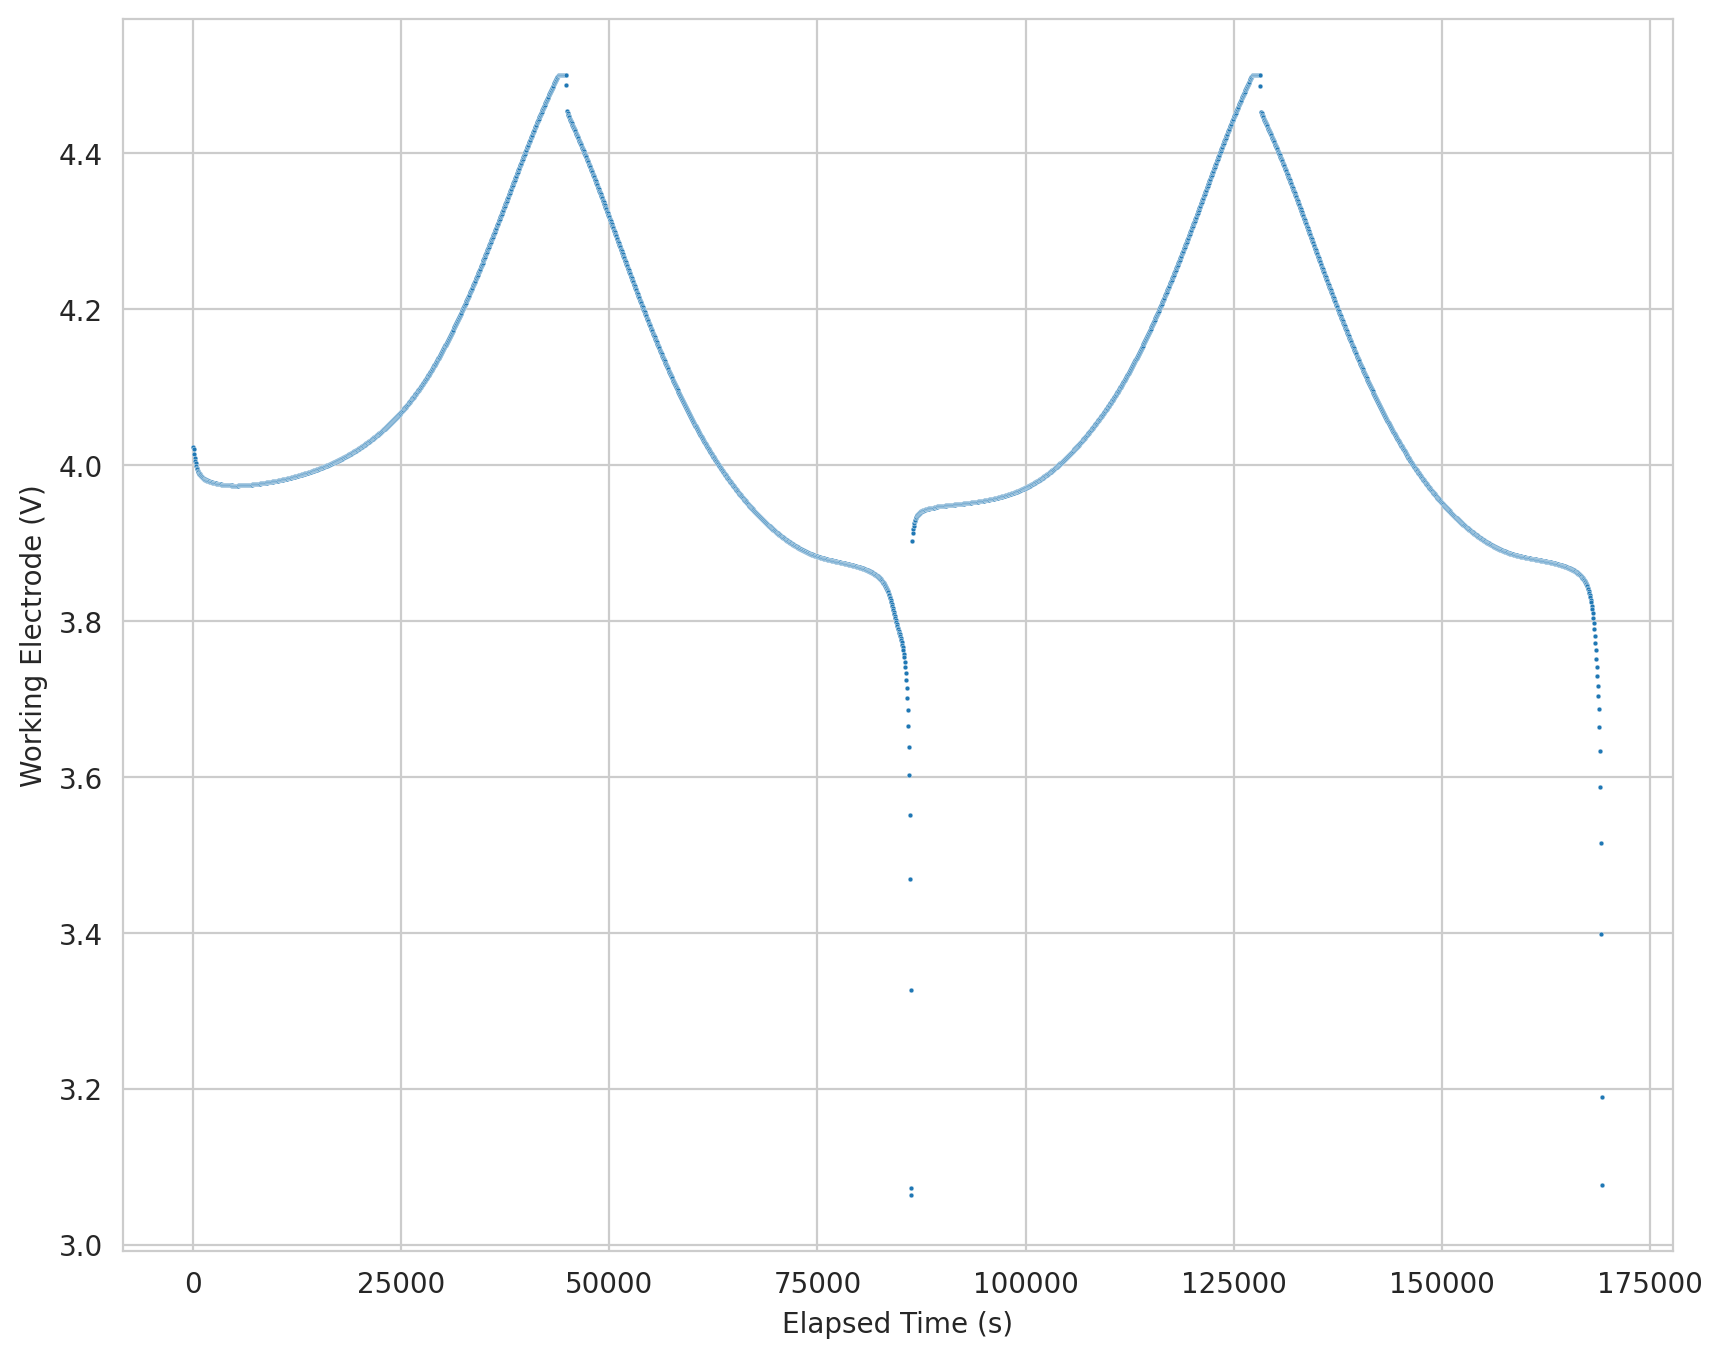

In [5]:
ax = start_plot(dpi=200)
sns.scatterplot(data=df, x="Elapsed Time (s)", y="Working Electrode (V)", s=3)

In [10]:
simulation_df = pd.read_csv("./results.csv")
simulation_df["Discharge capacity [A.h]"] *= -1
simulation_df["Current"] *= -1

charge_terminal_time = simulation_df.loc[simulation_df["Voltage"] == 4.5].iloc[-1]["Time"]
charge_capacity = simulation_df["Discharge capacity [A.h]"].max()

simulation_charge_df = simulation_df.loc[simulation_df["Time"] <= charge_terminal_time]
simulation_discharge_df = simulation_df.loc[simulation_df["Time"] > charge_terminal_time]
simulation_discharge_df["Discharge capacity [A.h]"] = simulation_discharge_df["Discharge capacity [A.h]"].apply(lambda x: charge_capacity - x)

IndexError: single positional indexer is out-of-bounds

/Users/andrewhuang/opt/anaconda3/envs/battery/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andrewhuang/opt/anaconda3/envs/battery/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andrewhuang/opt/anaconda3/envs/battery/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andrewhuang/opt/anaconda3/envs/battery/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

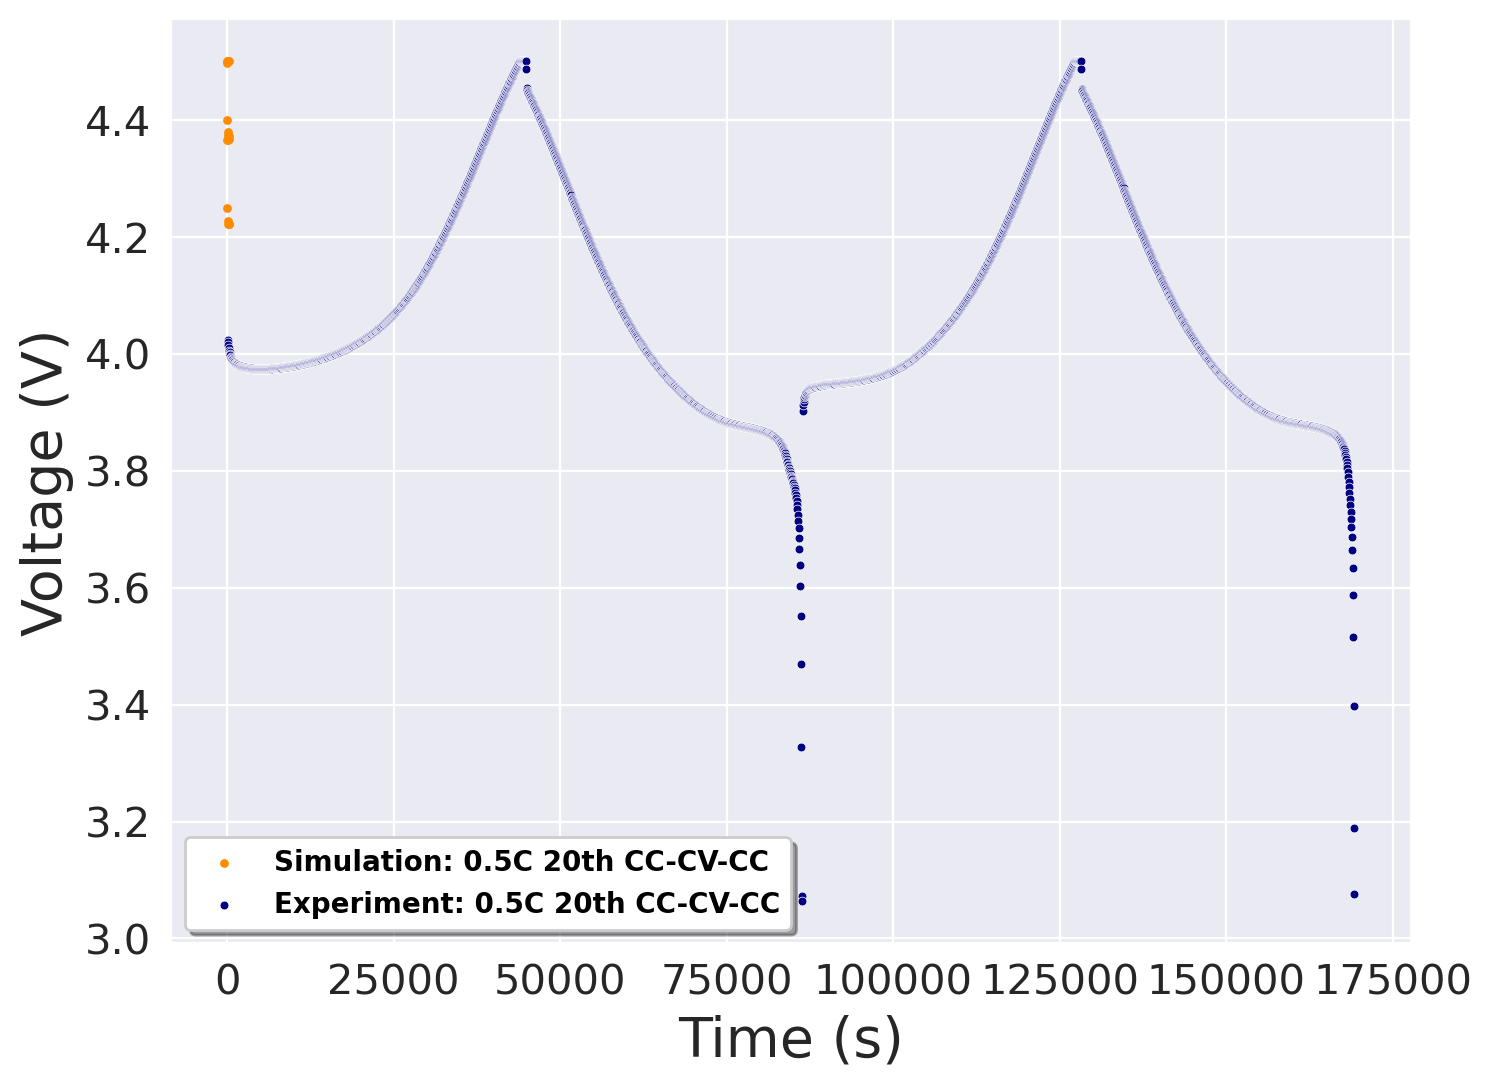

In [7]:
ax = start_plot(dpi=200, style="darkgrid", figsize=(8, 6))
sns.scatterplot(data=simulation_df, x="Time", y="Voltage", s=10, color="darkorange", linewidth=0, label="Simulation: 0.5C 20th CC-CV-CC")
sns.scatterplot(data=df, x="Elapsed Time (s)", y="Working Electrode (V)", ax=ax, s=10, color="navy", label="Experiment: 0.5C 20th CC-CV-CC")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Voltage (V)", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
ax.legend(shadow=True, prop={'weight': 'bold'})
plt.show()

NameError: name 'simulation_charge_df' is not defined

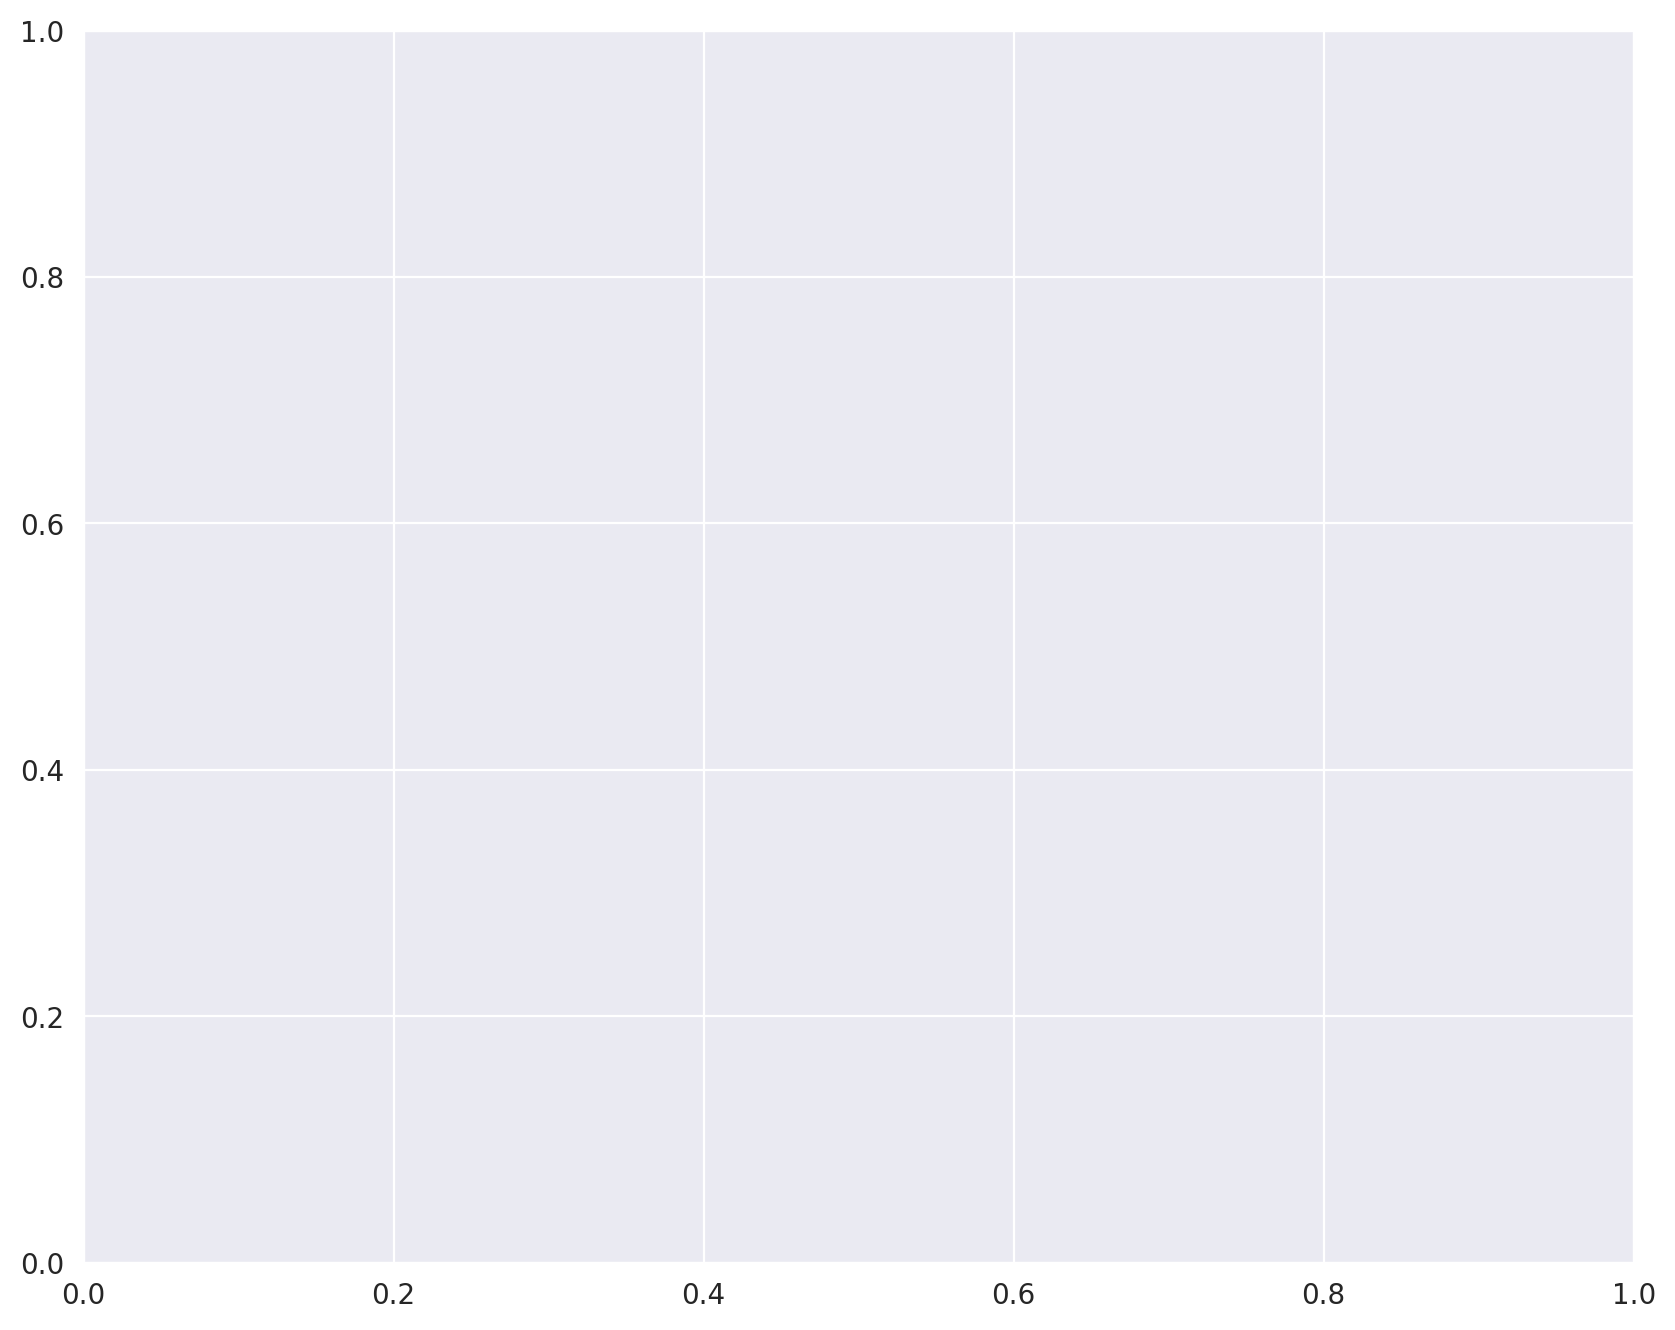

In [9]:
ax = start_plot(dpi=200, style="darkgrid")

sns.scatterplot(data=simulation_charge_df, x="Positive electrode stoichiometry", y="Voltage", s=10, color="teal", linewidth=0, marker="D", label="Simulation: 0.5C 20th Charge")
sns.scatterplot(data=simulation_discharge_df, x="Positive electrode stoichiometry", y="Voltage", s=10, color="navy", linewidth=0, marker="o", label="Simulation: 0.5C 20th Discharge")

charge_min_sto = simulation_charge_df["Positive electrode stoichiometry"].min()
charge_max_sto = simulation_charge_df["Positive electrode stoichiometry"].max()
discharge_min_sto = simulation_discharge_df["Positive electrode stoichiometry"].min()
discharge_max_sto = simulation_discharge_df["Positive electrode stoichiometry"].max()
ax.axvline(x=charge_min_sto, color="teal", linestyle="--", label=f"x = {charge_min_sto}")
ax.axvline(x=charge_max_sto, color="teal", linestyle="--", label=f"x = {charge_max_sto}")
ax.axvline(x=discharge_min_sto, color="navy", linestyle="--", label=f"x = {discharge_min_sto}")
ax.axvline(x=discharge_max_sto, color="navy", linestyle="--", label=f"x = {discharge_max_sto}")
ax.annotate(
    f'x = {charge_min_sto}', 
    xy=(charge_min_sto, 0), 
    xytext=(charge_min_sto, 0),
    arrowprops = dict(facecolor ='green', 
                                  shrink = 0.05)
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Voltage (V)", fontsize=20)
plt.xlabel("LCO Lithiation", fontsize=20)

ax.legend(shadow=True)
plt.show()

## 過電位分析

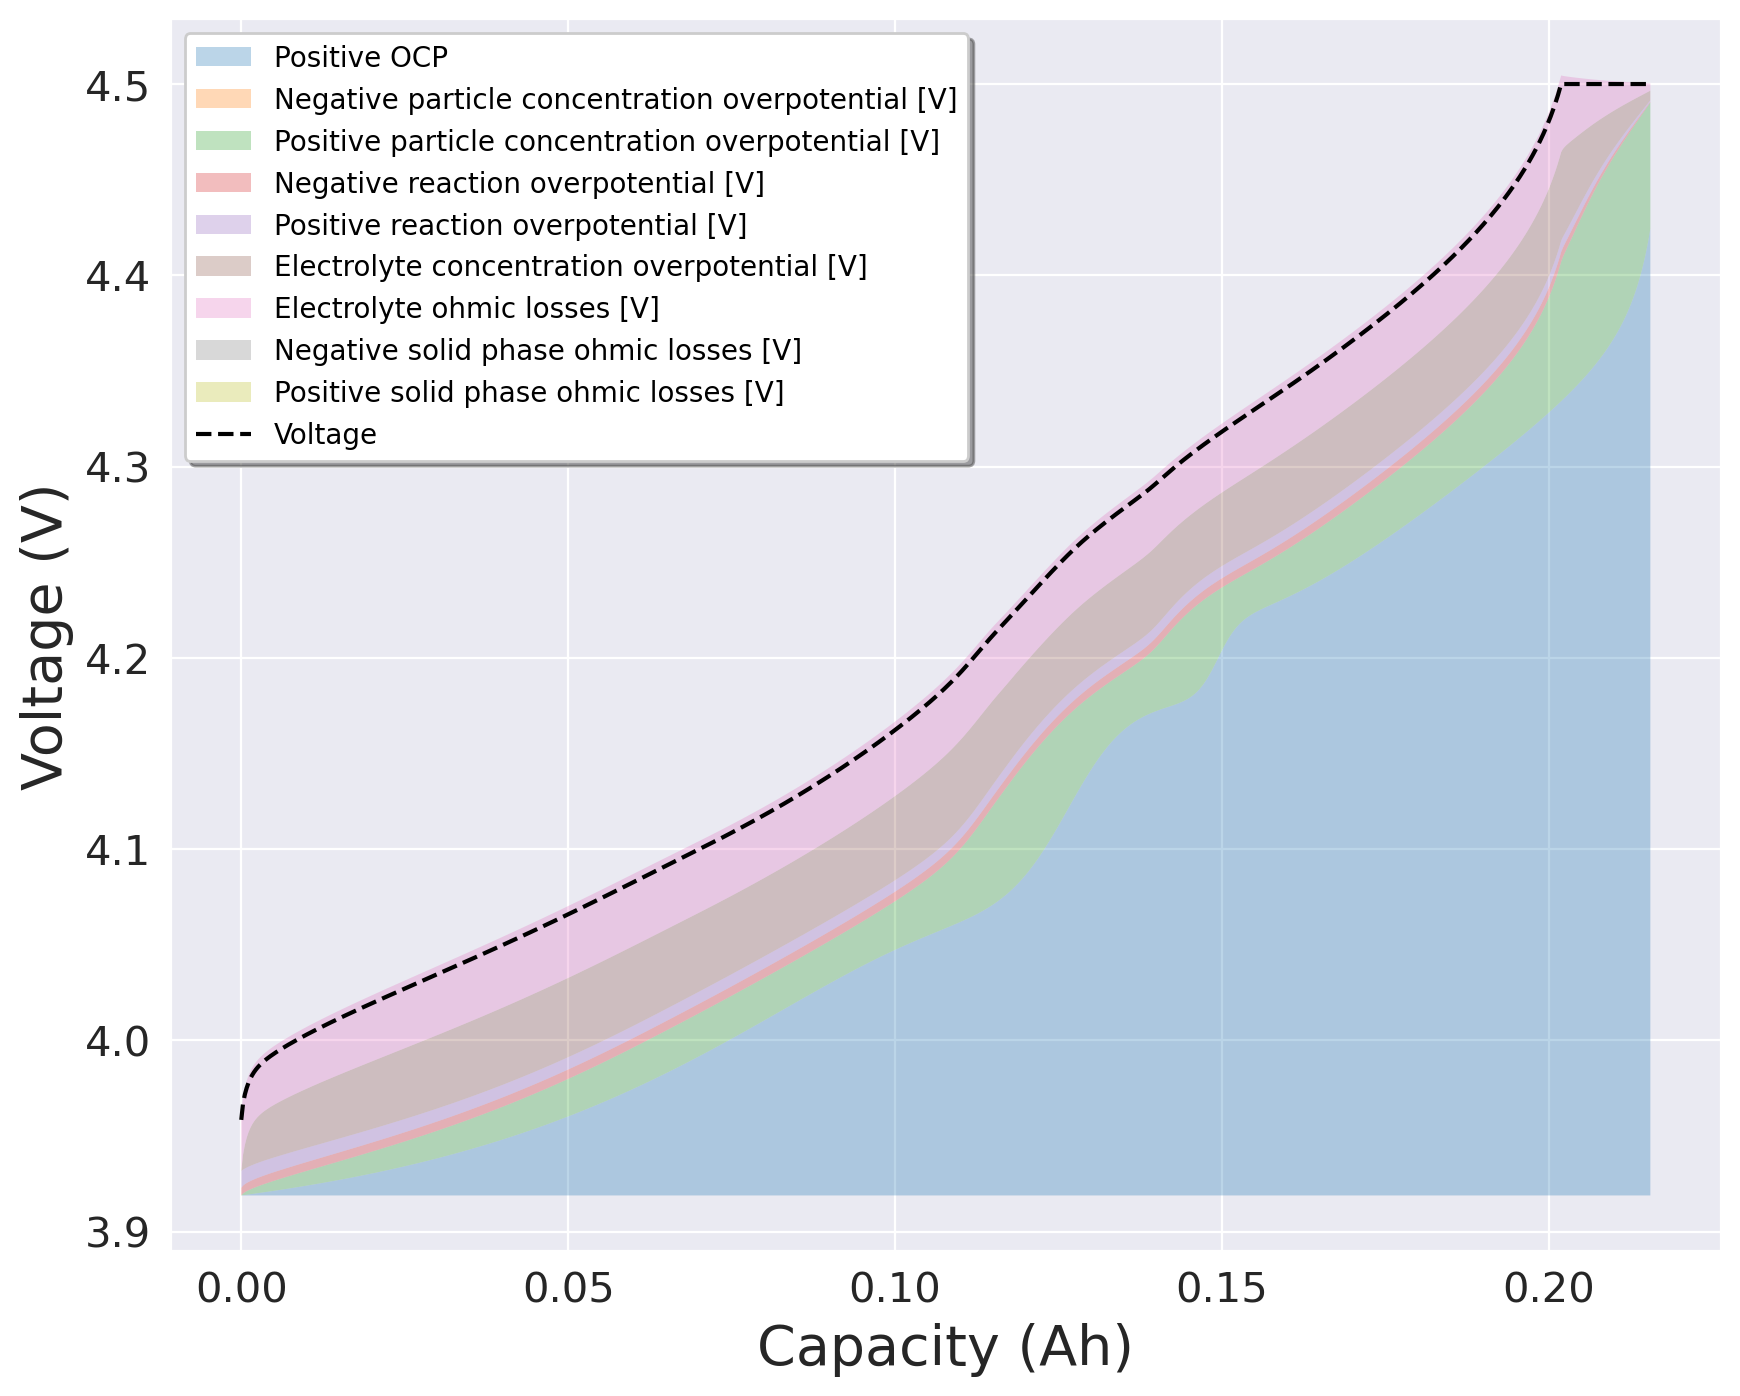

In [11]:
from pybamm.input.parameters.lithium_ion.Ramadass2004 import lico2_ocp_Ramadass2004
from pybamm.input.parameters.lithium_ion.Marquis2019 import lico2_ocp_Dualfoil1998

ax = start_plot(dpi=200, style="darkgrid")
cols = {'Battery negative particle concentration overpotential [V]': 'Negative particle concentration overpotential [V]',
       'Battery positive particle concentration overpotential [V]': 'Positive particle concentration overpotential [V]',
       'X-averaged battery negative reaction overpotential [V]': 'Negative reaction overpotential [V]',
       'X-averaged battery positive reaction overpotential [V]': 'Positive reaction overpotential [V]',
       'X-averaged battery concentration overpotential [V]': 'Electrolyte concentration overpotential [V]',
       'X-averaged battery electrolyte ohmic losses [V]': 'Electrolyte ohmic losses [V]',
       'X-averaged battery negative solid phase ohmic losses [V]': 'Negative solid phase ohmic losses [V]',
       'X-averaged battery positive solid phase ohmic losses [V]': 'Positive solid phase ohmic losses [V]'
       }



initial_lithiation = 0.75
LCO_OCP3 = lambda x: lico2_ocp_Dualfoil1998(x) * 0.93 + lico2_ocp_Ramadass2004(x) * 0.07

for i, col in enumerate(list(cols.keys())):
    if i == 0:
        ocp_positive = LCO_OCP3(simulation_charge_df['Positive electrode stoichiometry'])
        plt.fill_between(simulation_charge_df["Discharge capacity [A.h]"],
                        LCO_OCP3(initial_lithiation),
                        ocp_positive,
                        alpha=0.3,
                        label="Positive OCP"
                        )
        lower_bound = ocp_positive
    # else:
    eta = simulation_charge_df[col].apply(lambda x: x*-1 if x < 0 else x)
    plt.fill_between(simulation_charge_df["Discharge capacity [A.h]"],
                    lower_bound,
                    eta + lower_bound,
                    alpha=0.3,
                    label=cols[col]
                    )
    lower_bound += eta
    
sns.lineplot(data=simulation_charge_df, x="Discharge capacity [A.h]", y="Voltage", 
             label="Voltage", ls="--", color="k")

ax.legend(shadow=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Voltage (V)", fontsize=20)
plt.xlabel("Capacity (Ah)", fontsize=20)
ax.legend(shadow=True)

plt.show()

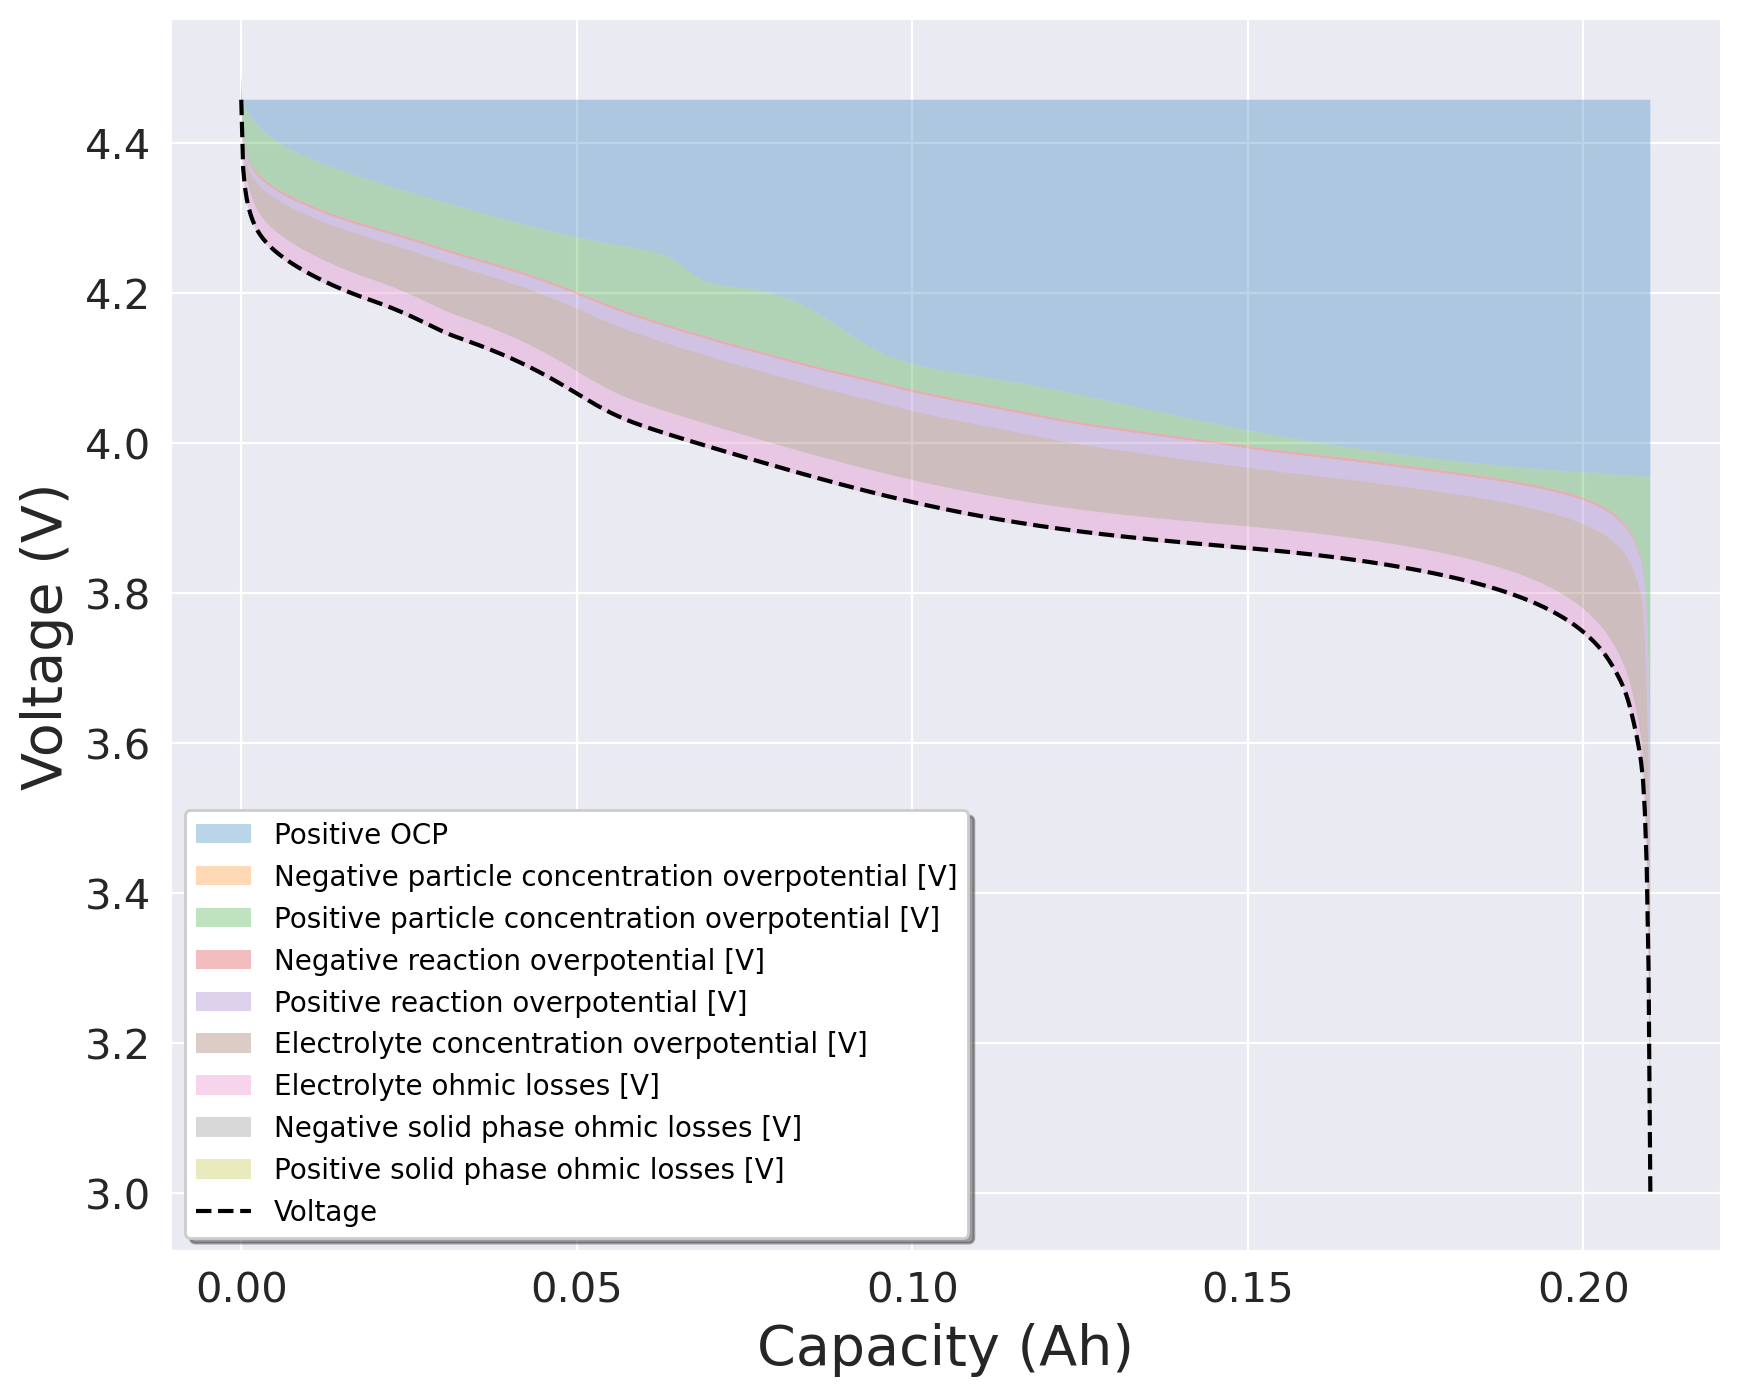

In [12]:
ax = start_plot(dpi=200, style="darkgrid")

initial_lithiation = simulation_discharge_df["Positive electrode stoichiometry"].iloc[0]
LCO_OCP3 = lambda x: lico2_ocp_Dualfoil1998(x) * 0.93 + lico2_ocp_Ramadass2004(x) * 0.07
discharge_ocp = simulation_discharge_df["Voltage"].iloc[0]

for i, col in enumerate(list(cols.keys())):
    if i == 0:
        ocp_loss = LCO_OCP3(initial_lithiation) - LCO_OCP3(simulation_discharge_df['Positive electrode stoichiometry'])
        plt.fill_between(simulation_discharge_df["Discharge capacity [A.h]"],
                        discharge_ocp - ocp_loss,
                        discharge_ocp,
                        alpha=0.3,
                        label="Positive OCP"
                        )
        upper_bound = discharge_ocp - ocp_loss
    # else:
    if col == 'Battery positive particle concentration overpotential [V]':
        eta = discharge_ocp - LCO_OCP3(initial_lithiation) - simulation_discharge_df[col]
    else:
        eta = simulation_discharge_df[col].apply(lambda x: x*(-1) if x < 0 else x)
    plt.fill_between(simulation_discharge_df["Discharge capacity [A.h]"],
                    upper_bound - eta,
                    upper_bound,
                    alpha=0.3,
                    label=cols[col]
                    )
    upper_bound -= eta
    
sns.lineplot(data=simulation_discharge_df, x="Discharge capacity [A.h]", y="Voltage", 
             label="Voltage", ls="--", color="k")

ax.legend(shadow=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Voltage (V)", fontsize=20)
plt.xlabel("Capacity (Ah)", fontsize=20)
ax.legend(shadow=True, loc="lower left")

plt.show()

In [13]:
import pandas as pd

particle_df = pd.read_csv("./Particle_concentration.csv")
particle_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,...,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800
1,1,0.007935,0.007991,0.008104,0.008273,0.008501,0.008788,0.009136,0.009546,0.010021,...,0.011171,0.011849,0.012599,0.013422,0.014319,0.015290,0.016336,0.017458,0.018655,0.019927
2,2,0.018704,0.018769,0.018901,0.019097,0.019359,0.019687,0.020079,0.020537,0.021060,...,0.022299,0.023015,0.023795,0.024638,0.025544,0.026511,0.027539,0.028628,0.029775,0.030980
3,3,0.029506,0.029567,0.029688,0.029869,0.030111,0.030413,0.030774,0.031194,0.031673,...,0.032803,0.033453,0.034159,0.034919,0.035732,0.036599,0.037516,0.038484,0.039500,0.040564
4,4,0.039209,0.039263,0.039370,0.039532,0.039747,0.040015,0.040336,0.040710,0.041136,...,0.042144,0.042725,0.043356,0.044037,0.044767,0.045545,0.046372,0.047247,0.048168,0.049135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,0.493701,0.493770,0.493908,0.494116,0.494392,0.494738,0.495154,0.495638,0.496192,...,0.497507,0.498268,0.499099,0.499998,0.500967,0.502006,0.503113,0.504290,0.505536,0.506852
446,446,0.505464,0.505534,0.505672,0.505880,0.506157,0.506503,0.506919,0.507404,0.507958,...,0.509275,0.510037,0.510868,0.511769,0.512739,0.513779,0.514888,0.516066,0.517314,0.518631
447,447,0.517243,0.517312,0.517451,0.517659,0.517937,0.518284,0.518700,0.519186,0.519741,...,0.521059,0.521823,0.522655,0.523558,0.524530,0.525571,0.526682,0.527862,0.529112,0.530432
448,448,0.529042,0.529112,0.529251,0.529460,0.529738,0.530085,0.530502,0.530989,0.531545,...,0.532867,0.533632,0.534466,0.535371,0.536345,0.537389,0.538502,0.539685,0.540938,0.542261


In [21]:
len(particle_df.iloc[0,:])

21

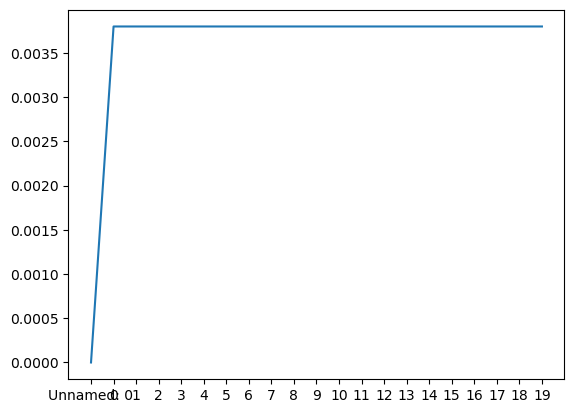

In [22]:
plt.plot(particle_df.iloc[0,:])